# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df= pd.read_csv('RTA_Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

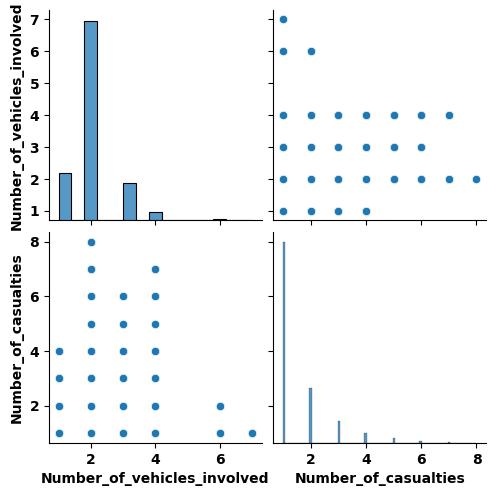

In [4]:
sns.pairplot(df)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [6]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
df.duplicated().sum()

0

<Axes: xlabel='Sex_of_driver'>

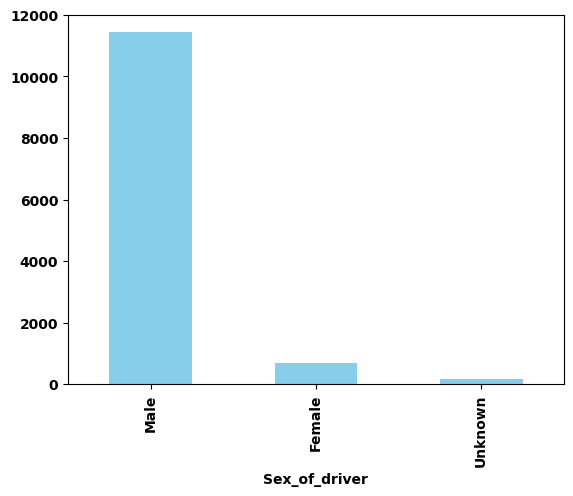

In [8]:
df['Sex_of_driver'].value_counts().plot(kind='bar', color='skyblue')

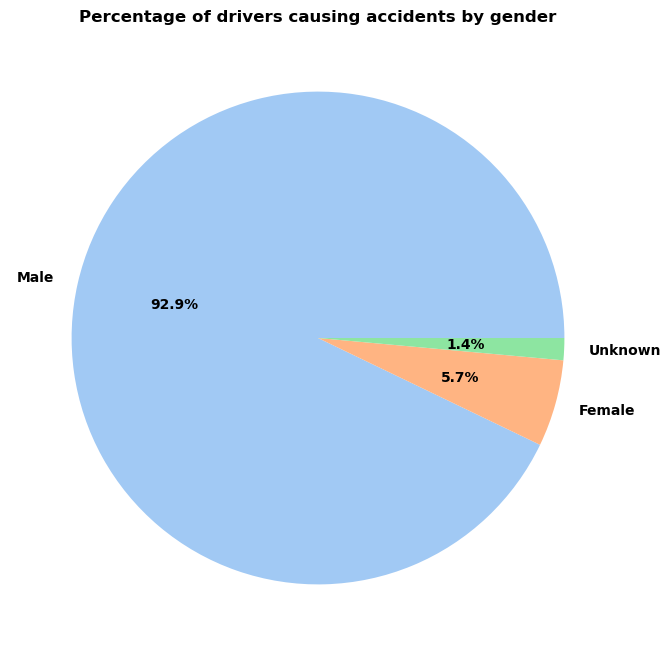

In [9]:
plt.figure(figsize=(8, 8))
Sex_of_driver_counts = df['Sex_of_driver'].value_counts()
plt.pie(Sex_of_driver_counts, labels=Sex_of_driver_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of drivers causing accidents by gender')
plt.show()

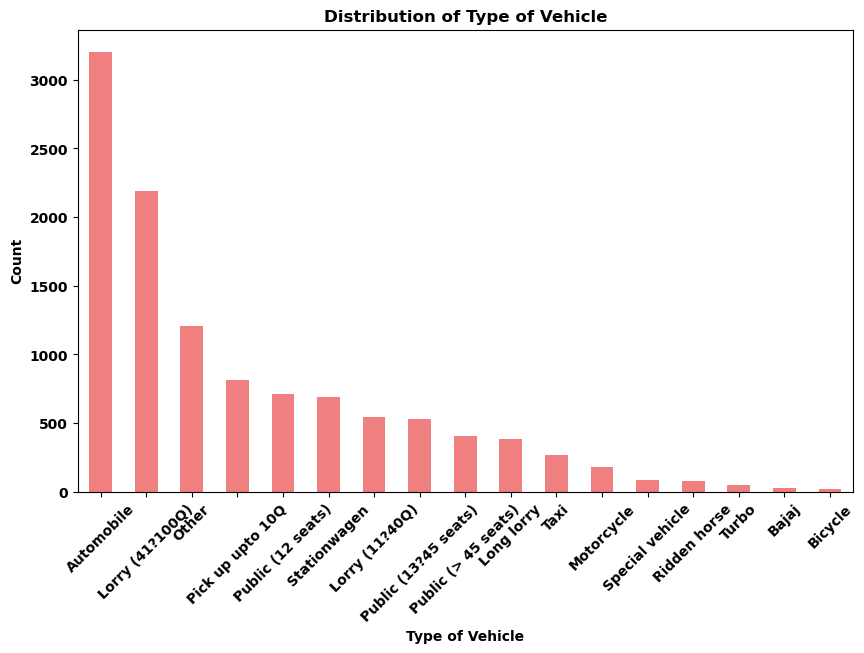

In [10]:
plt.figure(figsize=(10, 6))
df['Type_of_vehicle'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3120\1003533590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_week', data=df, palette='Set2')


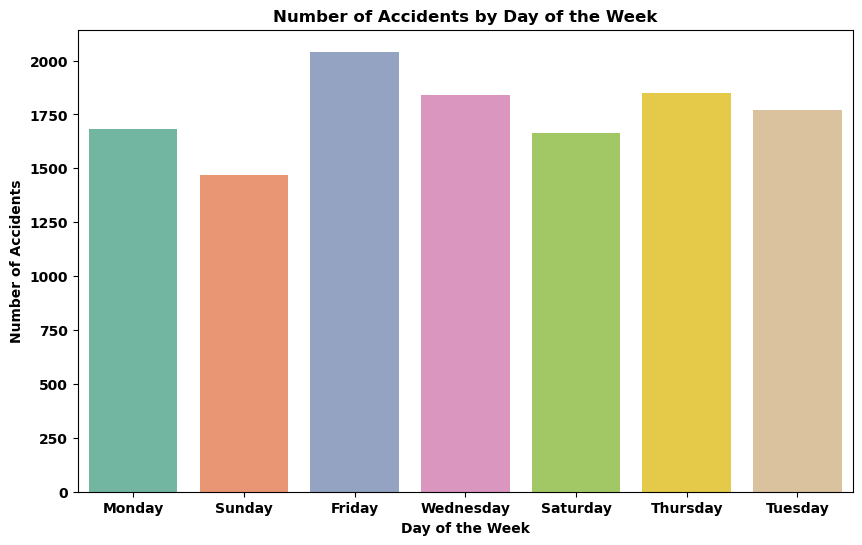

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data=df, palette='Set2')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

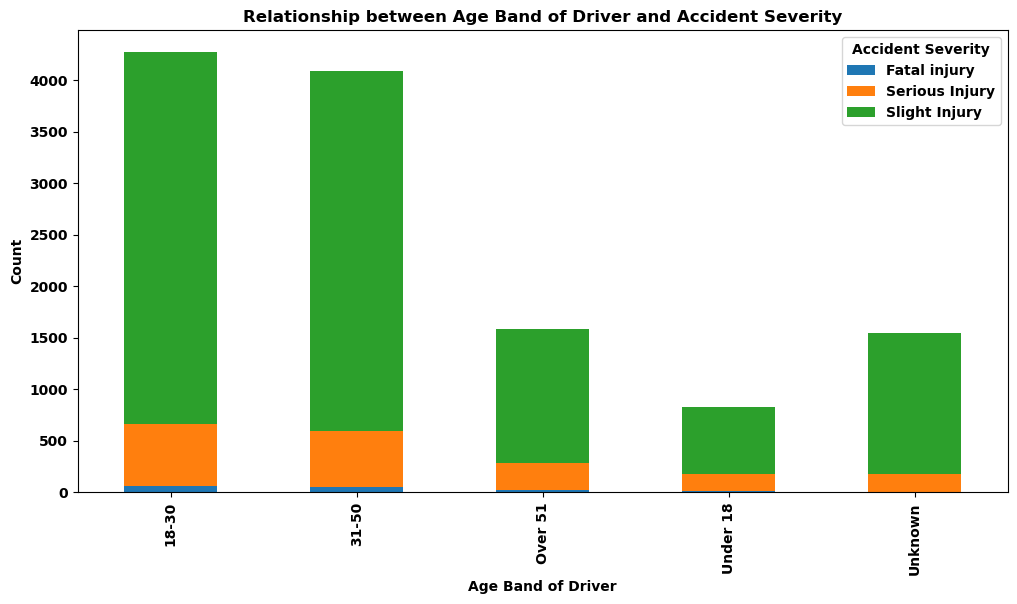

In [12]:
age_accident_counts = df.groupby(['Age_band_of_driver', 'Accident_severity']).size().unstack()

# Plotting the relationship between Age_band_of_driver and Accident_severity
age_accident_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship between Age Band of Driver and Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

In [37]:
#sns.pairplot(df[['Age_band_of_driver',	'Sex_of_driver',	'Educational_level',	'Vehicle_driver_relation',	'Driving_experience'	]]

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [13]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
df.drop('Time',axis=1,inplace=True)

In [15]:
#fixing datatype
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day_of_week                  12316 non-null  category
 1   Age_band_of_driver           12316 non-null  category
 2   Sex_of_driver                12316 non-null  category
 3   Educational_level            11575 non-null  category
 4   Vehicle_driver_relation      11737 non-null  category
 5   Driving_experience           11487 non-null  category
 6   Type_of_vehicle              11366 non-null  category
 7   Owner_of_vehicle             11834 non-null  category
 8   Service_year_of_vehicle      8388 non-null   category
 9   Defect_of_vehicle            7889 non-null   category
 10  Area_accident_occured        12077 non-null  category
 11  Lanes_or_Medians             11931 non-null  category
 12  Road_allignment              12174 non-null  category
 13  T

In [17]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [18]:
#accident_severity_categories = ['Slight Injury', 'Serious Injury', 'Fatal Injury']

severity_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}

df['Accident_severity']=df['Accident_severity'].map(severity_mapping)

In [19]:
df['Accident_severity'].value_counts()

Accident_severity
0    10415
1     1743
2      158
Name: count, dtype: int64

In [20]:
#handeling missing values
df["Educational_level"]=df["Educational_level"].fillna(df["Educational_level"].mode()[0])
df["Vehicle_driver_relation"]=df["Educational_level"].fillna(df["Educational_level"].mode()[0])
df["Driving_experience"]=df["Driving_experience"].fillna(df["Driving_experience"].mode()[0])
df["Type_of_vehicle"]=df["Type_of_vehicle"].fillna(df["Type_of_vehicle"].mode()[0])
df["Owner_of_vehicle"]=df["Owner_of_vehicle"].fillna(df["Owner_of_vehicle"].mode()[0])
df["Vehicle_movement"]=df["Vehicle_movement"].fillna(df["Vehicle_movement"].mode()[0])
df["Types_of_Junction"]=df["Types_of_Junction"].fillna(df["Types_of_Junction"].mode()[0])
df["Lanes_or_Medians"]=df["Lanes_or_Medians"].fillna(df["Lanes_or_Medians"].mode()[0])
df["Type_of_collision"]=df["Type_of_collision"].fillna(df["Type_of_collision"].mode()[0])
df["Road_surface_type"]=df["Road_surface_type"].fillna(df["Road_surface_type"].mode()[0])
df["Road_allignment"]=df["Road_allignment"].fillna(df["Road_allignment"].mode()[0])
df["Area_accident_occured"]=df["Area_accident_occured"].fillna(df["Area_accident_occured"].mode()[0])

df=df.dropna(subset=['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'])



In [21]:
df.isnull().sum() #no null values

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [22]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df[["Number_of_vehicles_involved","Number_of_casualties"]]= scaler.fit_transform(df[["Number_of_vehicles_involved","Number_of_casualties"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_3120\2759968003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Number_of_vehicles_involved","Number_of_casualties"]]= scaler.fit_transform(df[["Number_of_vehicles_involved","Number_of_casualties"]])


In [25]:
df.loc[:, 'Accident_severity'] = df['Accident_severity'].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4041 entries, 8 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day_of_week                  4041 non-null   category
 1   Age_band_of_driver           4041 non-null   category
 2   Sex_of_driver                4041 non-null   category
 3   Educational_level            4041 non-null   category
 4   Vehicle_driver_relation      4041 non-null   category
 5   Driving_experience           4041 non-null   category
 6   Type_of_vehicle              4041 non-null   category
 7   Owner_of_vehicle             4041 non-null   category
 8   Service_year_of_vehicle      4041 non-null   category
 9   Defect_of_vehicle            4041 non-null   category
 10  Area_accident_occured        4041 non-null   category
 11  Lanes_or_Medians             4041 non-null   category
 12  Road_allignment              4041 non-null   category
 13  Types_o

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype.name == 'category':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_3120\2468559726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_3120\2468559726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_3120\2468559726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [28]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,0,0,1,4,4,3,5,3,0,2,...,2,2,1,4,2,0,2,0,1,0
9,0,0,1,4,4,0,0,3,1,2,...,10,1,1,0,2,0,2,5,9,1
12,4,0,1,4,4,0,11,3,1,2,...,2,3,2,5,3,0,2,5,10,0
13,4,1,1,4,4,2,5,3,3,2,...,12,3,2,5,3,2,2,5,12,0
14,4,1,1,4,4,3,0,3,0,2,...,2,0,0,0,2,0,2,5,10,1


<Axes: >

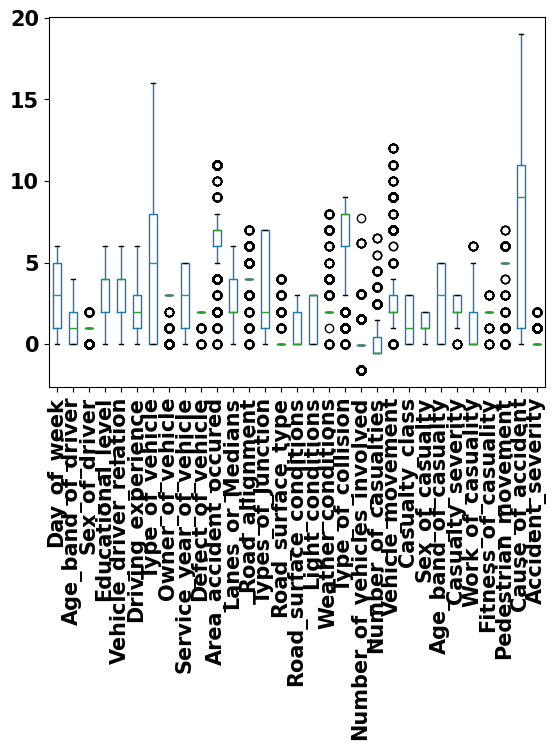

In [29]:
#detecting outliers
df.boxplot(grid=False, rot=90, fontsize=15)  

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: >

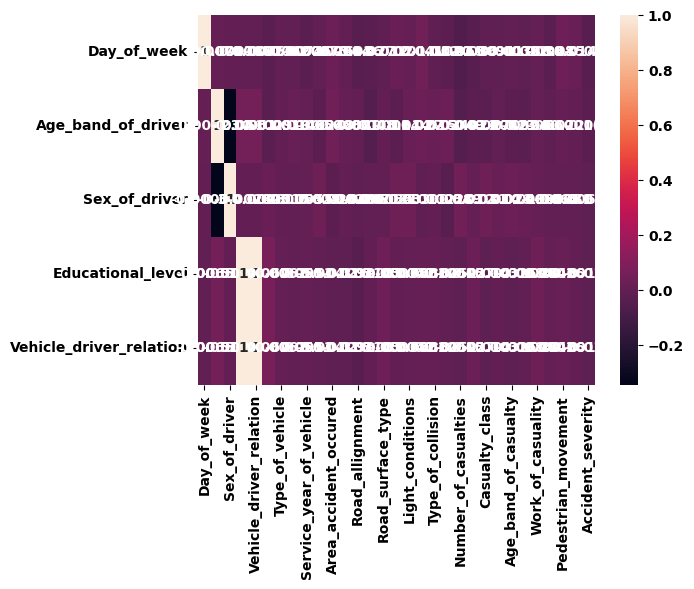

In [30]:
correlation_matrix=df.corr()
correlation_matrix
sns.heatmap(correlation_matrix[:5], annot=True)

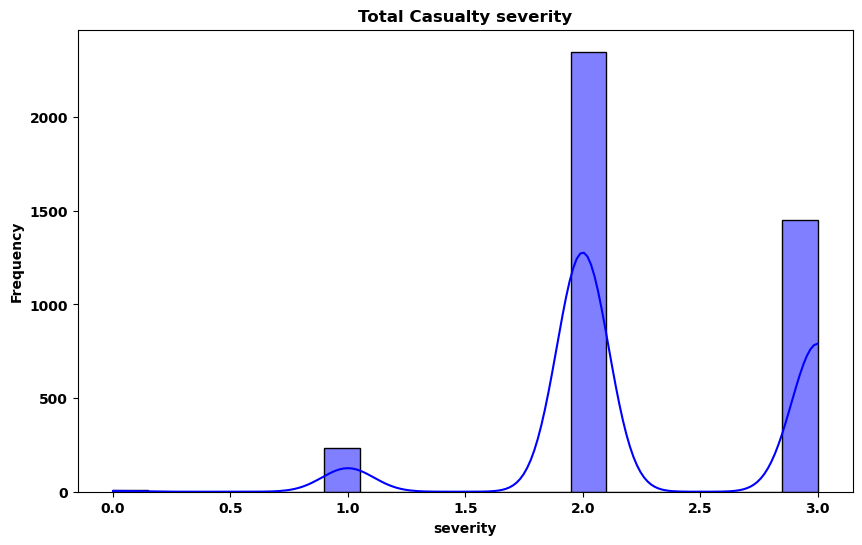

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Casualty_severity'], kde=True, bins=20, color='blue') #kde is the blue line
plt.title('Total Casualty severity')
plt.xlabel('severity')
plt.ylabel('Frequency')
plt.show()

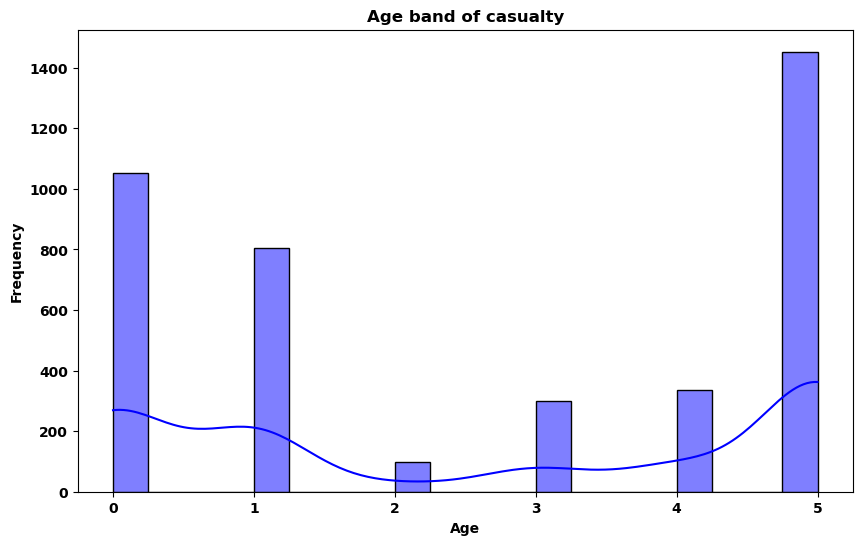

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_band_of_casualty'], kde=True, bins=20, color='blue') #kde is the blue line
plt.title('Age band of casualty')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [38]:
#The primary goal is to build models that can accurately predict the severity of accidents 
#and to identify the key factors that contribute to severe accidents.
#manual feature selection
X=df[['Age_band_of_driver','Sex_of_driver','Educational_level','Driving_experience','Type_of_vehicle','Service_year_of_vehicle','Vehicle_movement','Casualty_severity','Fitness_of_casuality','Weather_conditions','Cause_of_accident']]
y= df.Accident_severity

In [39]:
X.shape # I chose 11 out of 30 features after cleaning data

(4041, 11)

In [40]:
y.shape

(4041,)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape,y_train.shape

((3232, 11), (3232,))

In [43]:
X_test.shape,y_test.shape

((809, 11), (809,))

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state=0) #with default parameters

clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [45]:
y_pred_clf = clf.predict(X_test) 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy=accuracy_score(y_pred_clf, y_test)
precision = precision_score(y_test, y_pred_clf,average='weighted')
recall = recall_score(y_test, y_pred_clf,average='weighted')
f1 = f1_score(y_test, y_pred_clf,average='weighted')


print(f"The accuracy of the Logistic Regression Classifier is: {accuracy*100:.2f}%")
print(f'Precision: {precision}, Recall: {recall}')
print(f'F1 Score: {f1}')

The accuracy of the Logistic Regression Classifier is: 84.30%
Precision: 0.7106760929652657, Recall: 0.8430160692212608
F1 Score: 0.7712098715075786


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
y_pred_dt = dt.predict(X_test) 

In [49]:
accuracy=accuracy_score(y_pred_dt, y_test)
precision = precision_score(y_test, y_pred_dt,average='weighted')
recall = recall_score(y_test, y_pred_dt,average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"The accuracy of the Decision Tree Classifier is: {accuracy*100:.2f}%")
print(f'Precision: {precision}, Recall: {recall}')
print(f'F1 Score: {f1}')

The accuracy of the Decision Tree Classifier is: 72.19%
Precision: 0.7284172181231598, Recall: 0.7218788627935723
F1 Score: 0.7250870598089685


#### Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC

svm_model=SVC(random_state=0)

svm_model.fit(X_train, y_train)

SVC(random_state=0)

In [51]:
y_pred_svm = svm_model.predict(X_test) 

In [52]:
accuracy=accuracy_score(y_pred_svm, y_test)
precision = precision_score(y_test, y_pred_svm,average='weighted') #
recall = recall_score(y_test, y_pred_svm,average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"The accuracy of the Support Vector Machine is: {accuracy*100:.2f}%")
print(f'Precision: {precision}, Recall: {recall}')
print(f'F1 Score: {f1}')

The accuracy of the Support Vector Machine is: 84.30%
Precision: 0.7106760929652657, Recall: 0.8430160692212608
F1 Score: 0.7712098715075786


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### K-Neighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = knn_model.predict(X_test) 

In [55]:
accuracy=accuracy_score(y_pred_knn, y_test)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"The accuracy of the K-Neighbors Classifier is: {accuracy*100:.2f}%")
print(f'Precision: {precision}, Recall: {recall}')
print(f'F1 Score: {f1}')

The accuracy of the K-Neighbors Classifier is: 83.07%
Precision: 0.7368911794565667, Recall: 0.830655129789864
F1 Score: 0.7712098715075786


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

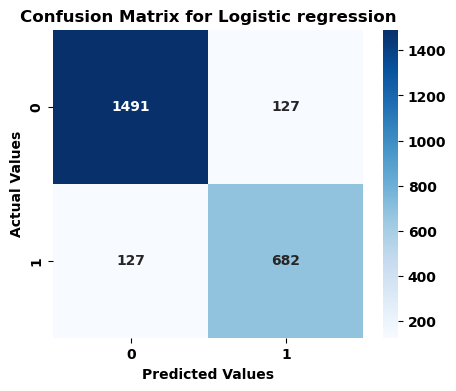

In [67]:
from sklearn.metrics import multilabel_confusion_matrix

clf_matrix_multi=multilabel_confusion_matrix(y_test, y_pred_clf)


plt.figure(figsize=(5, 4))
sns.heatmap(clf_matrix_multi.sum(axis=0), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

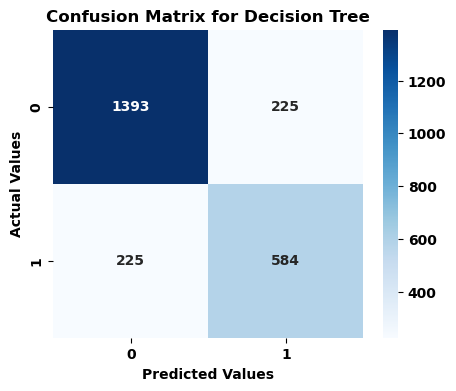

In [68]:
dt_matrix_multi=multilabel_confusion_matrix(y_test, y_pred_dt)


plt.figure(figsize=(5, 4))
sns.heatmap(dt_matrix_multi.sum(axis=0), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

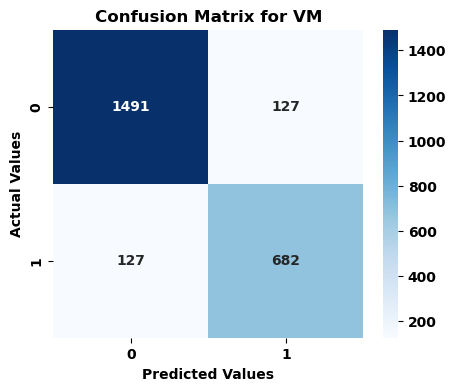

In [70]:
svm_matrix_multi=multilabel_confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(5, 4))
sns.heatmap(svm_matrix_multi.sum(axis=0), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

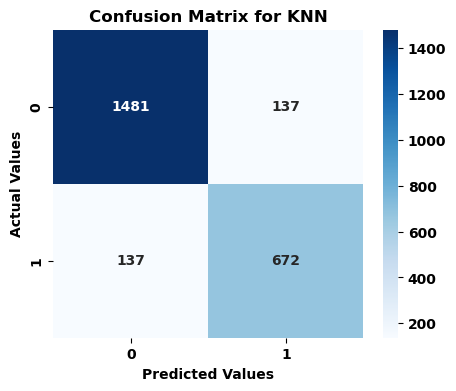

In [73]:
knn_matrix_multi=multilabel_confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(5, 4))
sns.heatmap(knn_matrix_multi.sum(axis=0), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# ROC Curve and AUC - 

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

- The highest performing models : Logistic regression and Decision Tree yielded equal accuracy 84.30%, the also predicted equal TP,FN,FP,TN and the exact same F1-score with 0.77
- when comparing the computational efficiency all the models were fast and that might be due to not customizing the perameters and choosing to leave it to the default parameters in addition to the data size (4041 data entry) , only a subset of features were used and not all of them (feature selection of 11 features)
- choosing the best performing model depends of the metrics like accuracy, recall, precision and the result in the confusion matrix and that's what I chose based on.
-  For future importvements different data clearning steps to do (instead of mode replacment , maybe a different technique to ensure better accuracy), trying RandomizedSearch or GridSearch to find the optimal parameters for each model (due to time constraints I was not able to do it), eplore how ROC Curve and AUC works and implement it (since it was not explained during lecture hours), using automatic feature selection technique instead of choosing manually, applying feature engineering (since I saw that doing initial experiment without it may be enough, will do another expirement with it and compare the results)